In [8]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,cross_val_predict,cross_validate
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn import impute

import warnings
warnings.filterwarnings("ignore")

In [31]:
# reading in train data (10000 observations)
train = pd.read_csv('train_clean.csv')

In [32]:
train.head()

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.039852,...,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0.0
1,1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.039852,...,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0.0
2,2,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,0.039852,...,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603,0.0
3,3,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,0.039852,...,0.008261,0.007206,0.002409,0.006117,0.004516,0.003200,0.008419,0.006527,0.009600,0.0
4,4,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,0.039852,...,0.004848,0.006312,0.004462,0.003671,0.004946,0.008889,0.001670,0.008126,0.009827,0.0


In [33]:
train = train.drop(['Unnamed: 0'],axis=1)

In [34]:
# read train target label data (response)
target = pd.read_csv('train_labels.csv')

In [35]:
target.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [ ]:
# merge response + predictors in train data
train = pd.merge(train, target)

In [37]:
# evaluate predictor types
for col in train.columns:
  if train[col].dtype == 'O':
    print(col)

There is no predictor that is type object

In [38]:
# reading in test data (10000 observations)
test = pd.read_csv('test_clean.csv')

In [40]:
test = test.drop(['Unnamed: 0'],axis=1)

In [48]:
# storing missing values for each column in train
val_train = train.isna().sum()
print(val_train.sum())

# storing missing values for each column in test
val_test = test.isna().sum()
print(val_test.sum())

0
0


There is no missing values for any column in train and test data

In [46]:
# # creating dataframe to store how many values are missing in each column for both train and test
# na_df = pd.DataFrame(columns = train.columns)
# na_df.loc['Train'] = val_train
# na_df.loc['Test'] = val_test
# na_df

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
Train,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Test,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# # identify predictors with large number of missing values 
# col_missing = []
# for col in na_df.columns:
#     if na_df.loc['Train',col]/10000 > .8:
#         col_missing.append(col)
# len(col_missing)

In [51]:
# # visualize distribution of predictors with large number of missing values
# for col in col_missing:
#   sns.displot(train, x=col)

In [15]:
# # drop predictors with more than 80% missing values
# train = train.drop(col_missing,axis=1)

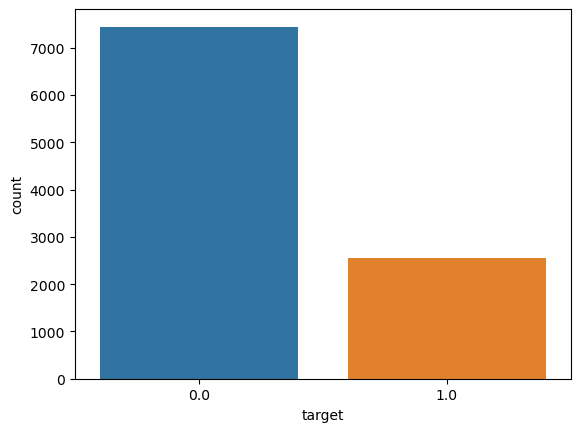

In [52]:
# visualize distribution of response 
sns.countplot(x = 'target', data = train);

In [53]:
# Proportion of 0 and 1s in response
train.target.value_counts(1)

0.0    0.7447
1.0    0.2553
Name: target, dtype: float64

In [67]:
train.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=164)

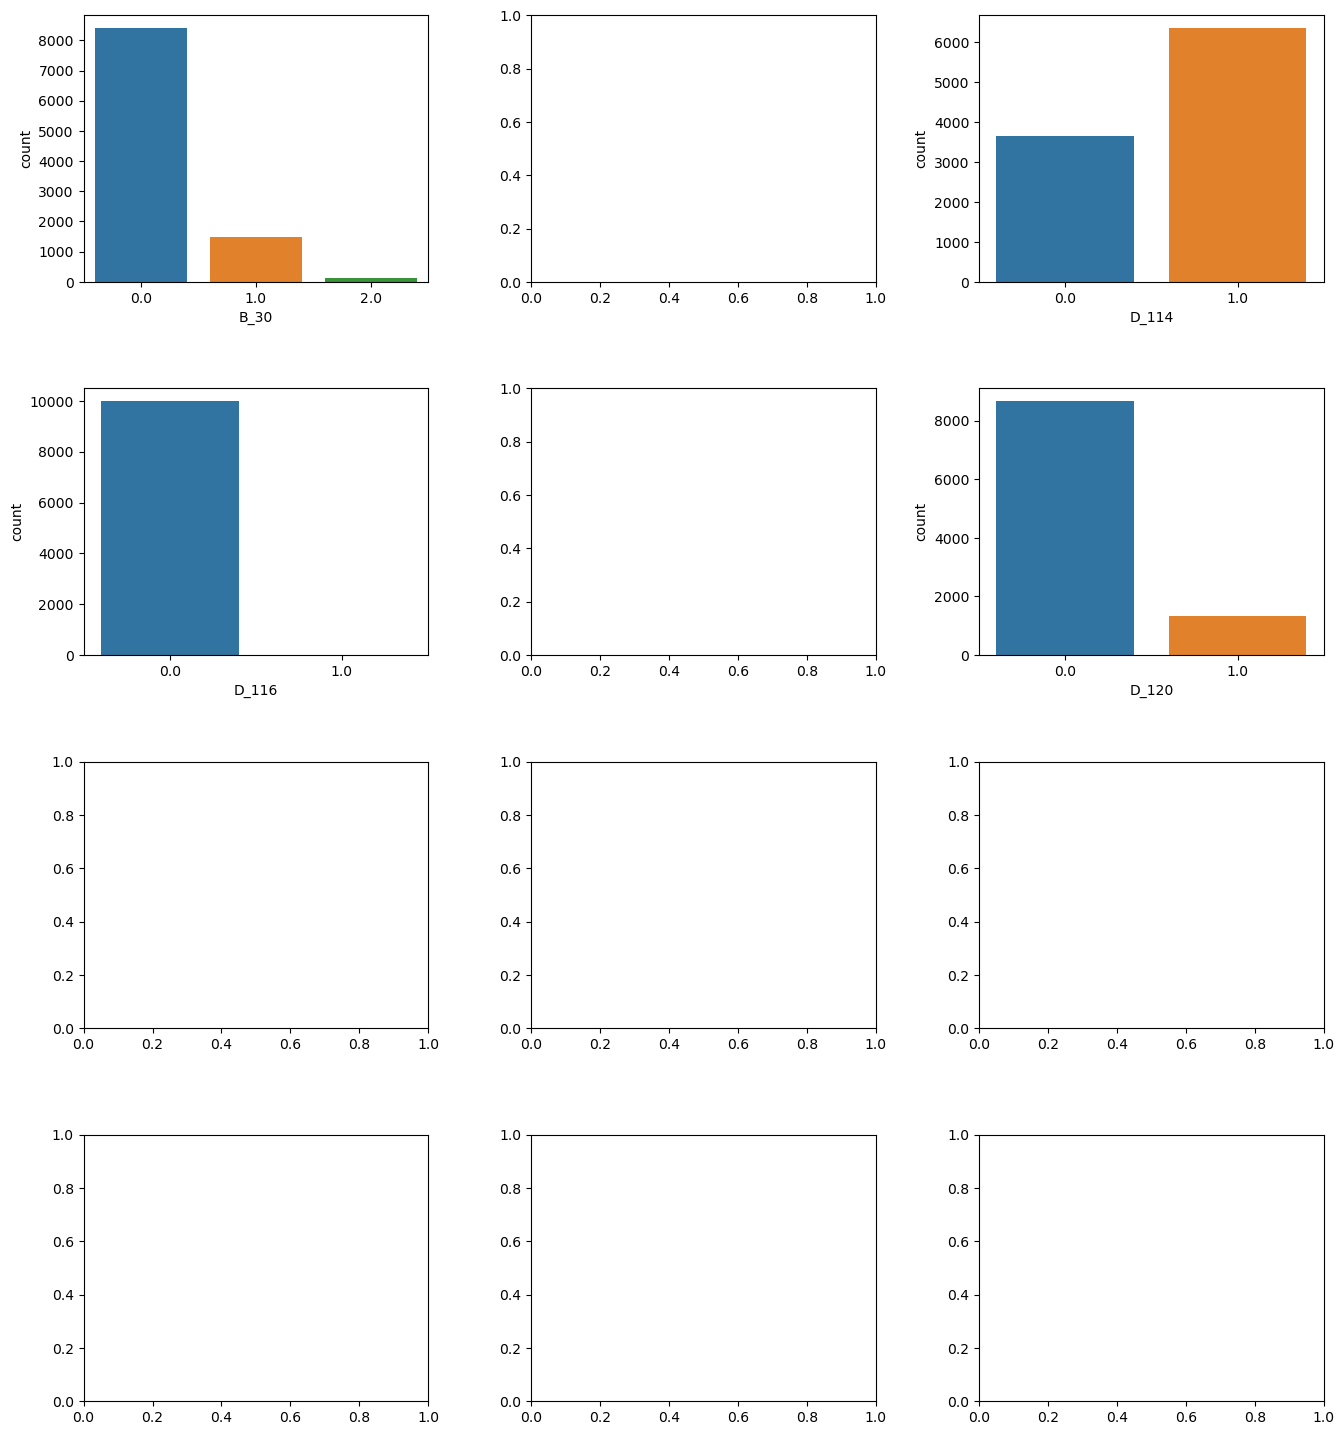

In [65]:
# Distribution of categorical variables 
fig, ax = plt.subplots(4, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=train, x ='B_30', ax=ax[0, 0]);
# sns.countplot(data=train, x ='B_38', ax=ax[0, 1]);

sns.countplot(data=train, x ='D_114', ax=ax[0, 2]);
sns.countplot(data=train, x ='D_116', ax=ax[1, 0]);
# sns.countplot(data=train, x ='D_117', ax=ax[1, 1]);
sns.countplot(data=train, x ='D_120', ax=ax[1, 2]);
# sns.countplot(data=train, x ='D_126', ax=ax[2, 0]);
# sns.countplot(data=train, x ='D_68', ax=ax[3, 1]);

ValueError: Could not interpret input 'D_66'

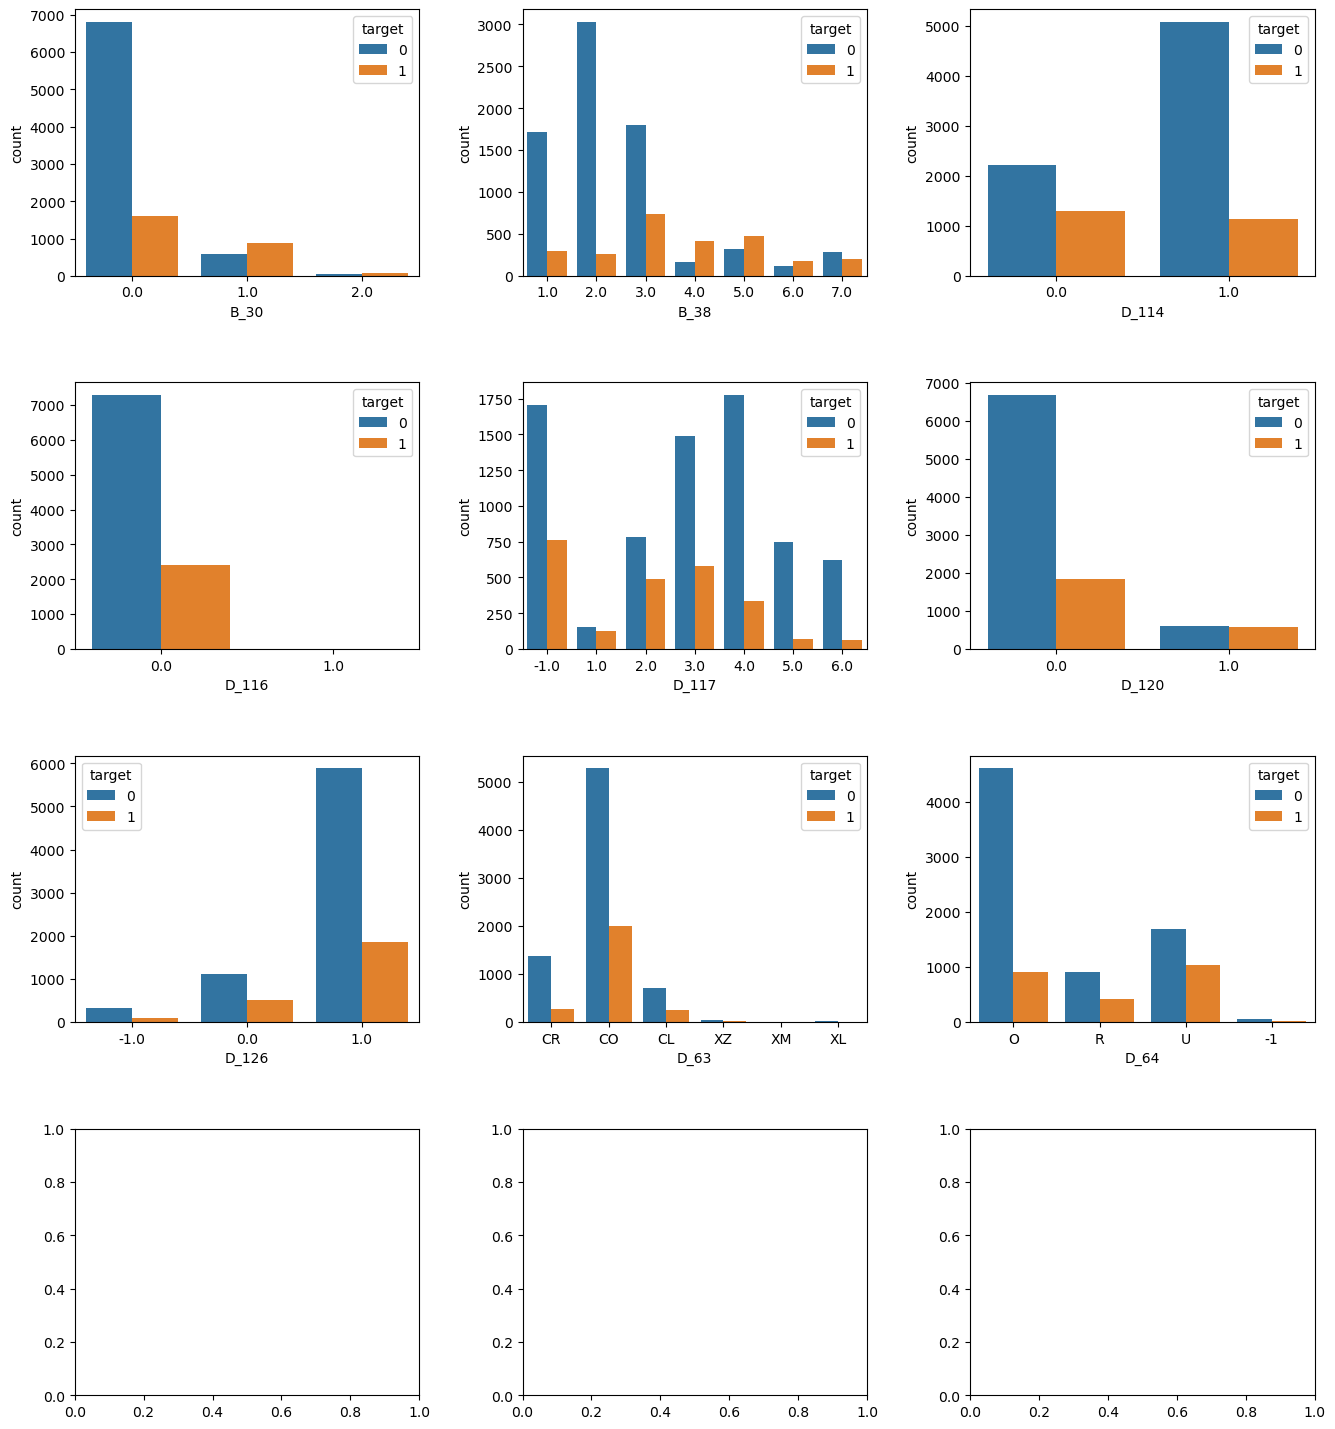

In [19]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=train, x ='B_30', hue ='target', ax=ax[0, 0]);
sns.countplot(data=train, x ='B_38', hue ='target', ax=ax[0, 1]);
sns.countplot(data=train, x ='D_114', hue ='target', ax=ax[0, 2]);
sns.countplot(data=train, x ='D_116', hue ='target', ax=ax[1, 0]);
sns.countplot(data=train, x ='D_117', hue ='target', ax=ax[1, 1]);
sns.countplot(data=train, x ='D_120', hue ='target', ax=ax[1, 2]);
sns.countplot(data=train, x ='D_126', hue ='target', ax=ax[2, 0]);
sns.countplot(data=train, x ='D_63', hue ='target', ax=ax[2, 1]);
sns.countplot(data=train, x ='D_64', hue ='target', ax=ax[2, 2]);
sns.countplot(data=train, x ='D_66', hue ='target', ax=ax[3, 0]);
sns.countplot(data=train, x ='D_68', hue ='target', ax=ax[3, 1]);

In [87]:
# convert categorical variables to dummy variables
train = pd.get_dummies(train, columns = ['D_63', 'D_64'])
test = pd.get_dummies(test, columns = ['D_63', 'D_64'])

In [88]:
#separate predictors and response
y_train = train.target 
X_train = train.drop(['target', 'customer_ID'], axis=1)

In [93]:
#find optimal k to impute missing values
total_acc = []
k_values = [i for i in range(1, 51)]

# Number of missing values
missing_values = X_train.isna().sum().sum()

for k in k_values:
  weighted_avg_acc = []

  # Impute the missing values
  X_imputed_k = pd.DataFrame(impute.KNNImputer(n_neighbors = k).fit_transform(X_train), columns = X_train.columns)

  for p in X_train.columns:
    # p is a series

    if X_train[p].isna().sum() != 0:
      # If the predictor has missing values then remove the predictor from the full imputed table
      X_imputed_non_missing_k = X_imputed_k.loc[~X_train[p].isnull(),:]
      X_imputed_non_missing_k.reset_index(drop = True, inplace = True)
      # Remove the observations with missing values in the p column
      predictor_nonmissing = X_imputed_k.loc[~X_train[p].isnull(), p]

      # Cross_val_score
      knn_model = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
      cv_scores = cross_val_score(knn_model, X_imputed_non_missing_k, predictor_nonmissing, 
                                  cv = 5, scoring = 'accuracy')
      weighted_avg_acc.append(cv_scores.mean() * X_train[p].isna().sum())

    else:
      pass 

  total_acc.append((sum(weighted_avg_acc)/(X_train.isna().sum().sum())))
  # Sum(weighted_avg_mae) = total error
optimal_k = k_values[total_acc.index(min(total_acc))]

plt.plot(k_values, total_acc)
plt.xlabel('K')
plt.ylabel('Total Accuracy')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#imputing missing values with 2 nearest neighbors, where the neighbors have equal weights

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=7)

#Use the object method 'fit_transform' to impute missing values
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)